In [2]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")
#file = uproot.open("tracking_losses_ntuple_Dst0ToD0EE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")

#look at particles only from Signal
allcolumns = file.arrays()
tracked = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromSignal)]
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromSignal)] 

#ak.num(tracked, axis=0)



In [4]:
#lost
l_eph = lost["brem_photons_pe"]
ak.nan_to_num(l_eph)
l_pT = lost["pt"]
l_sci_x = lost["scifi_hit_pos_x"]
ak.nan_to_num(l_sci_x)

#found
f_eph = tracked["brem_photons_pe"]
ak.nan_to_num(f_eph)
f_pT = tracked["pt"]
f_sci_x = tracked["scifi_hit_pos_x"]
ak.nan_to_num(f_sci_x)

l_sci_x, l_pT = ak.broadcast_arrays(l_sci_x, l_pT)
f_sci_x, f_pT = ak.broadcast_arrays(f_sci_x, f_pT)

l_sci_x = ak.to_numpy(ak.flatten(l_sci_x))
l_pT = ak.to_numpy(ak.flatten(l_pT))
f_sci_x = ak.to_numpy(ak.flatten(f_sci_x))
f_pT = ak.to_numpy(ak.flatten(f_pT))

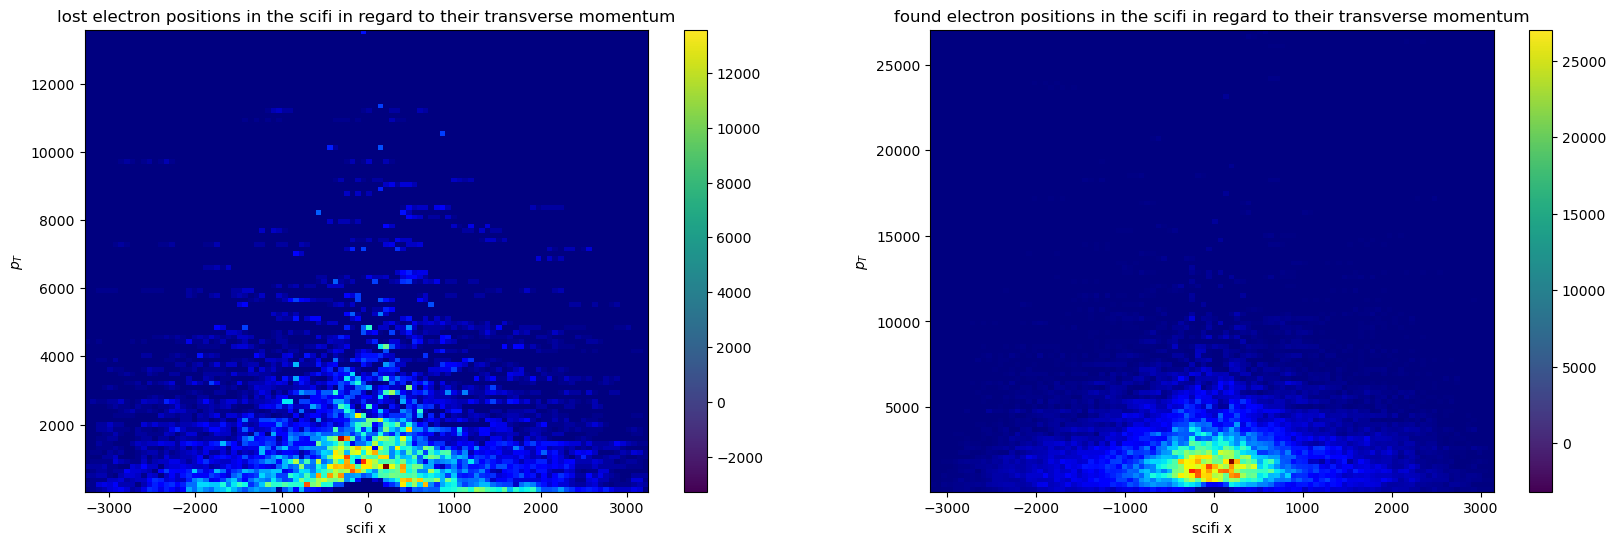

In [5]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax0.hist2d(l_sci_x, l_pT, bins=100,  cmap=plt.cm.jet)
ax0.set_xlabel("scifi x")
ax0.set_ylabel(r"$p_T$")
ax0.set_title("lost electron positions in the scifi in regard to their transverse momentum")
pcm0 = ax0.pcolormesh([l_sci_x,l_pT])
plt.colorbar(pcm0,ax=ax0)

ax1.hist2d(f_sci_x, f_pT, bins=100,  cmap=plt.cm.jet)
ax1.set_xlabel("scifi x")
ax1.set_ylabel(r"$p_T$")
ax1.set_title("found electron positions in the scifi in regard to their transverse momentum")
pcm1 = ax1.pcolormesh([f_sci_x,f_pT])
plt.colorbar(pcm1,ax=ax1)

"""
B:
we can see that the lost electrons cover a wider spread in the x direction of the scifi tracker,
while most of those have low pT 

"""
plt.show()

In [6]:
energy_found = tracked["energy"]
energy_found = energy_found[tracked["brem_photons_pe_length"]!=0]
#ak.nan_to_num(energy_found)

e_ph_found = tracked["brem_photons_pe"]
e_ph_found = e_ph_found[tracked["brem_photons_pe_length"]!=0]
#ak.nan_to_num(e_ph_found, nan=[0])
e_ph_found = ak.sum(e_ph_found, axis=-1, keepdims=True)
print(e_ph_found)
print(energy_found)

energy_lost = lost["energy"]
energy_lost = energy_lost[lost["brem_photons_pe_length"]!=0]
#ak.nan_to_num(energy_lost)

e_ph_lost = lost["brem_photons_pe"]
e_ph_lost = e_ph_lost[lost["brem_photons_pe_length"]!=0]
#ak.nan_to_num(e_ph_lost)
e_ph_lost = ak.sum(e_ph_lost, axis=-1,keepdims=True)

#e_ph_found, energy_found = ak.broadcast_arrays(e_ph_found, energy_found)
#e_ph_lost, energy_lost = ak.broadcast_arrays(e_ph_lost, energy_lost)

e_ph_found = ak.to_numpy(ak.flatten(e_ph_found))
energy_found = ak.to_numpy(energy_found)

e_ph_lost = ak.to_numpy(ak.flatten(e_ph_lost))
energy_lost = ak.to_numpy(energy_lost)

print(e_ph_found[1])
print(energy_found[1])

[[4.09e+04], [8.66e+03], [8.07e+04], ..., [5.63e+03], [6.29e+03], [2.26e+03]]
[4.62e+04, 9.36e+03, 1.34e+05, 5.63e+04, ..., 2.01e+04, 6.94e+03, 7.83e+03]
8657.132
9355.866625028413


In [7]:
q_e_found = e_ph_found/energy_found
q_e_lost = e_ph_lost/energy_lost

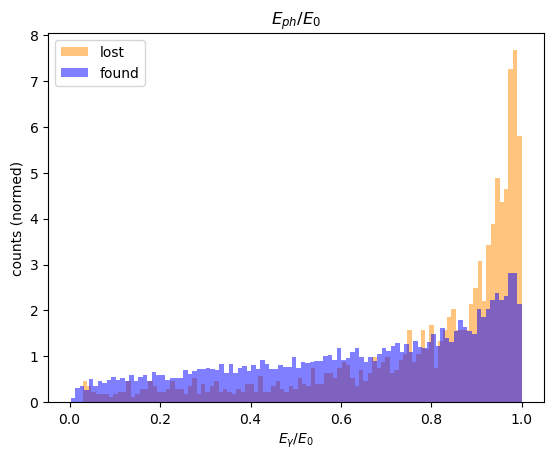

In [8]:
plt.hist(q_e_lost, bins=100, density=True, alpha=0.5, histtype='bar', color="darkorange", label="lost")
plt.hist(q_e_found, bins=100, density=True, alpha=0.5, histtype='bar', color="blue", label="found")
plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("counts (normed)")
plt.title(r'$E_{ph}/E_0$')
plt.legend()

"""
B:
we can clearly see that lost electrons are responsible for higher energy photons
"""

plt.show()

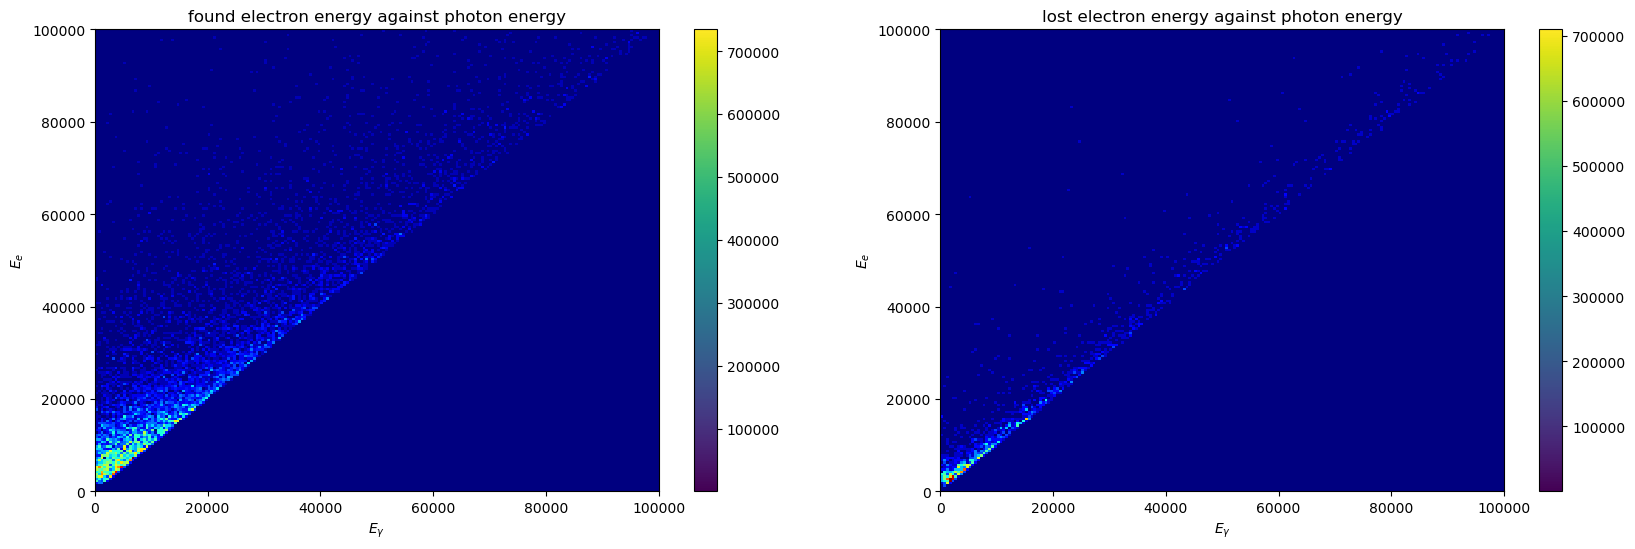

In [9]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax0.hist2d(e_ph_found, energy_found, density=True, bins=200,  cmap=plt.cm.jet, range=[[0,100000],[0,100000]])
ax0.set_xlabel(r"$E_\gamma$")
ax0.set_ylabel(r"$E_e$")
ax0.set_title("found electron energy against photon energy")
pcm0 = ax0.pcolormesh([e_ph_found, energy_found])
plt.colorbar(pcm0,ax=ax0)

ax1.hist2d(e_ph_lost, energy_lost, density=True, bins=200, cmap=plt.cm.jet, range=[[0,100000],[0,100000]])
ax1.set_xlabel(r"$E_\gamma$")
ax1.set_ylabel(r"$E_e$")
ax1.set_title("lost electron energy against photon energy")
pcm1 = ax1.pcolormesh([e_ph_lost, energy_lost])
plt.colorbar(pcm1,ax=ax1)

"""
B:
concentrated at the E_ph/E_0~1 line especially at lower energies.
lost E_ph to E_0: fewer entries at lower q_e
"""
plt.show()

In [52]:
brem_vtx_x_found = tracked["brem_vtx_x"]
brem_vtx_x_found = brem_vtx_x_found[tracked["brem_vtx_x_length"]!=0]
brem_vtx_x_found = ak.to_numpy(ak.flatten(brem_vtx_x_found))

brem_vtx_z_found = tracked["brem_vtx_z"]
brem_vtx_z_found = brem_vtx_z_found[tracked["brem_vtx_z_length"]!=0]
#print(ak.to_numpy(brem_vtx_z_found))
brem_vtx_z_found = ak.to_numpy(ak.flatten(brem_vtx_z_found))

brem_vtx_x_lost = lost["brem_vtx_x"]
brem_vtx_x_lost = brem_vtx_x_lost[lost["brem_vtx_x_length"]!=0]
brem_vtx_x_lost = ak.to_numpy(ak.flatten(brem_vtx_x_lost))

brem_vtx_z_lost = lost["brem_vtx_z"]
brem_vtx_z_lost = brem_vtx_z_lost[lost["brem_vtx_z_length"]!=0]
brem_vtx_z_lost = ak.to_numpy(ak.flatten(brem_vtx_z_lost))

#vtx_x_fit= ak.to_numpy(vtx_x_found)
#vtx_z_fit = ak.to_numpy(vtx_z_found)

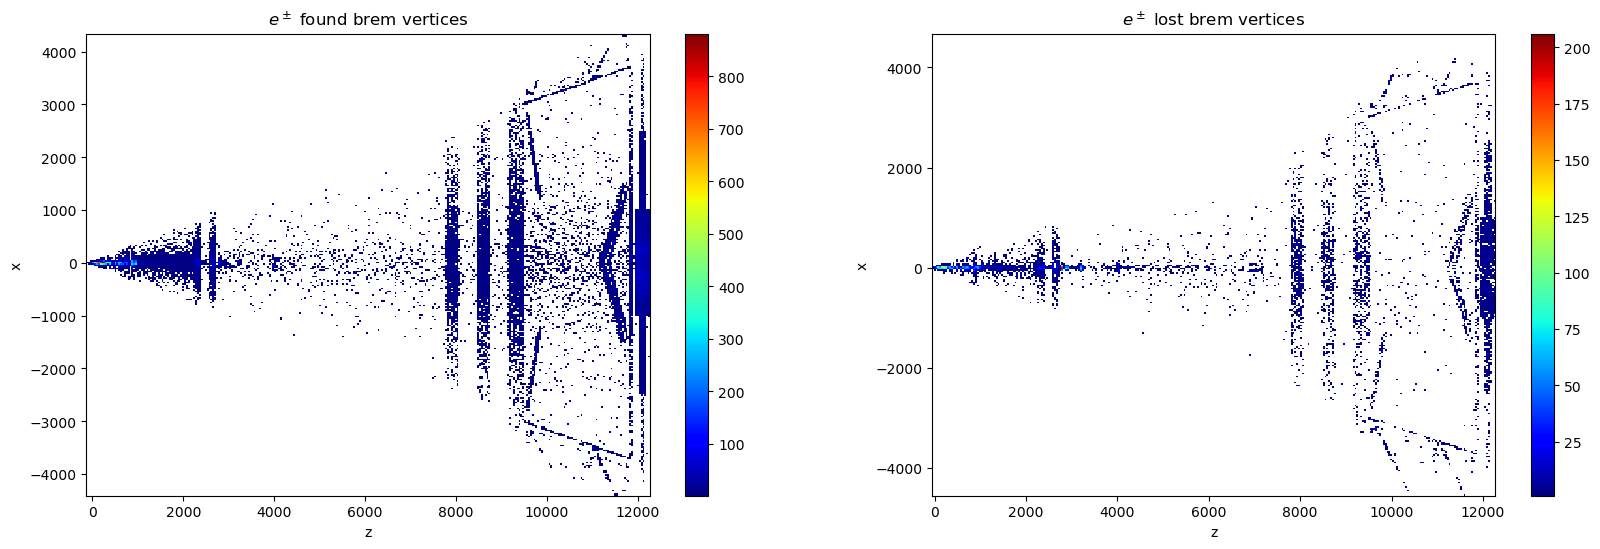

In [53]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

a0 = ax0.hist2d(brem_vtx_z_found, brem_vtx_x_found, density=False, bins=300,  cmap=plt.cm.jet, cmin=1)
ax0.set_xlabel("z")
ax0.set_ylabel("x")
ax0.set_title(r"$e^\pm$ found brem vertices")

plt.colorbar(a0[3],ax=ax0)

a1 = ax1.hist2d(brem_vtx_z_lost, brem_vtx_x_lost, density=False, bins=300, cmap=plt.cm.jet, cmin=1)
ax1.set_xlabel("z")
ax1.set_ylabel("x")
ax1.set_title(r"$e^\pm$ lost brem vertices")
#ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.colorbar(a1[3], ax=ax1)

"""
z: VeLo - RICH1 - TT - Magnet - T1,T2,T3 - RICH2 - M1
B:
vertices of lost e photons are more densely concentrated around the beampipe, especially in the z range of the magnet
found: vertices are densely located @ or around the detectors, while there are no clusters in the z range of the magnet
"""
plt.show()

In [47]:
#plot singular tracks by fitting brem vertices
vtx_z_found = tracked["brem_vtx_z"]
vtx_z_found = vtx_z_found[tracked["brem_vtx_z_length"]>3]

vtx_x_found = tracked["brem_vtx_x"]
vtx_x_found = vtx_x_found[tracked["brem_vtx_x_length"]>3]

vtx_z_lost = lost["brem_vtx_z"]
vtx_z_lost = vtx_z_lost[lost["brem_vtx_z_length"]>3]

vtx_x_lost = lost["brem_vtx_x"]
vtx_x_lost = vtx_x_lost[lost["brem_vtx_x_length"]>3]

def cubic_fit(x, a, b, c, d):
    return (a + b*x + c*x**2 + d*x**3)


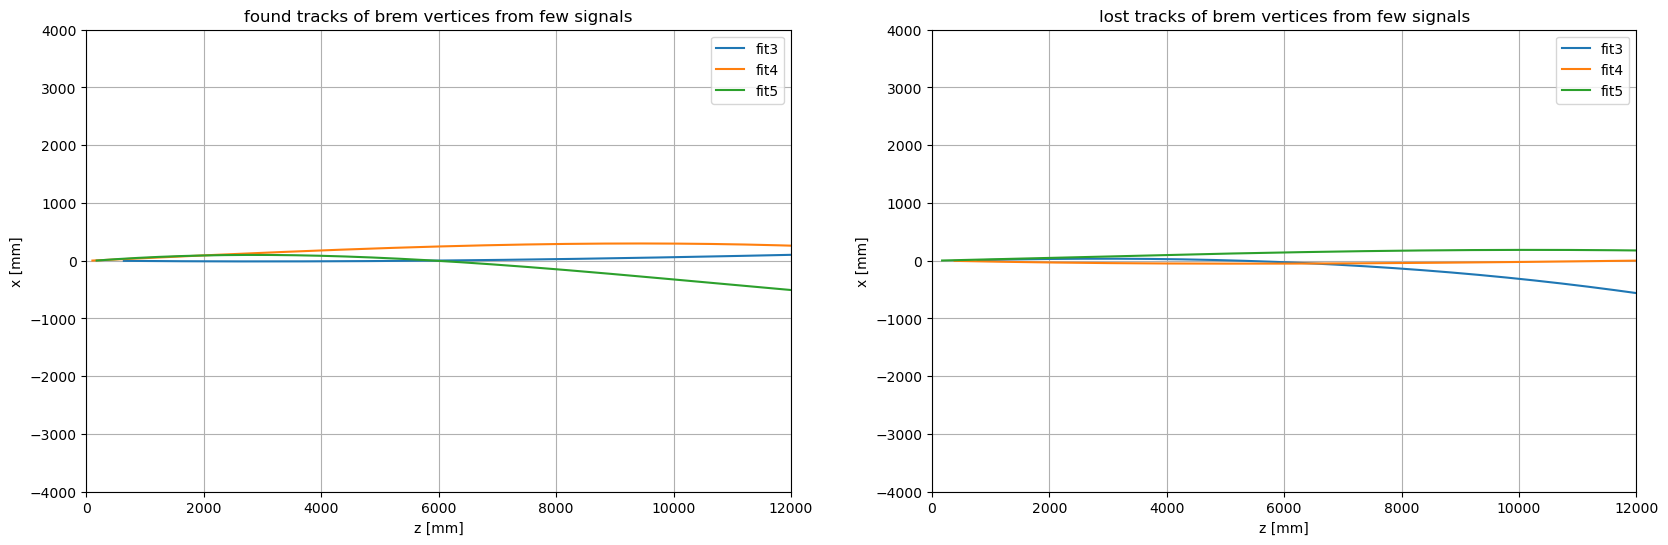

In [50]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

for i in range(3,6):
    popt, pcov = curve_fit(cubic_fit,ak.to_numpy(vtx_z_found[i,:]),ak.to_numpy(vtx_x_found[i,:]))
    z_coord = np.linspace(vtx_z_found[i,0],12000,1000)
    fit = cubic_fit(z_coord, popt[0], popt[1], popt[2], popt[3])
    ax0.plot(z_coord, fit, "-", label="fit"+str(i))

ax0.legend()
ax0.set_xlabel("z [mm]")
ax0.set_ylabel("x [mm]")
ax0.set_title("found tracks of brem vertices from few signals")
ax0.set(xlim=(0,12000), ylim=(-4000,4000))
ax0.grid()

for i in range(3,6):
    popt, pcov = curve_fit(cubic_fit,ak.to_numpy(vtx_z_lost[i,:]),ak.to_numpy(vtx_x_lost[i,:]))
    z_coord = np.linspace(vtx_z_lost[i,0],12000,1000)
    fit = cubic_fit(z_coord, popt[0], popt[1], popt[2], popt[3])
    ax1.plot(z_coord, fit, "-", label="fit"+str(i))

ax1.legend()
ax1.set_xlabel("z [mm]")
ax1.set_ylabel("x [mm]")
ax1.set_title("lost tracks of brem vertices from few signals")
ax1.set(xlim=(0,12000), ylim=(-4000,4000))
ax1.grid()

plt.show()